# Phishing URL EDA

This notebook creates:
- A class distribution plot
- Basic feature summary statistics


In [7]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import pandas as pd

PROJECT_ROOT = Path.cwd().resolve().parent
SRC_DIR = PROJECT_ROOT / 'src'
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

from data import load_phishing_dataset, build_feature_matrix

DATA_PATH = SRC_DIR / 'phishing_site_urls.csv'
print(f'Using dataset: {DATA_PATH}')


Using dataset: C:\Users\jaw31\AI_seminar_lab2\ai-cyber-lab2-JonahWhitney\ai-cyber-lab2\src\phishing_site_urls.csv


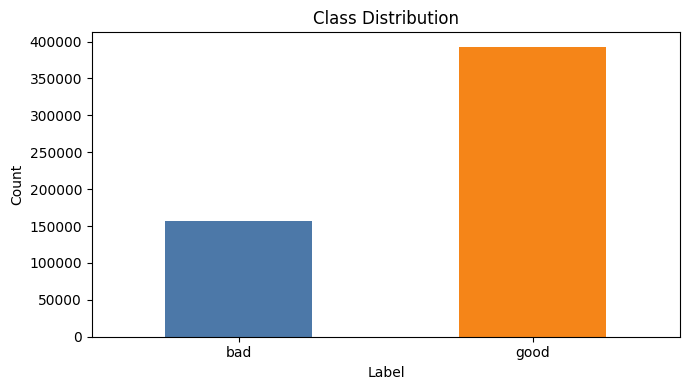

Label
bad     156422
good    392924
Name: count, dtype: int64

In [8]:
raw_df = pd.read_csv(DATA_PATH)
label_counts = raw_df['Label'].str.lower().value_counts().sort_index()

label_counts.plot(kind='bar', color=['#4C78A8', '#F58518'], figsize=(7, 4))
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

label_counts


In [9]:
inputs, labels = load_phishing_dataset(DATA_PATH)
X = build_feature_matrix(inputs)

feature_names = [
    'url_length', 'host_length', 'path_length', 'query_length',
    'num_host_parts', 'num_dots', 'num_hyphens', 'num_at',
    'num_question_marks', 'num_equals', 'num_slashes',
    'num_digits', 'num_letters', 'num_special_chars',
    'double_slash_in_path', 'contains_https_text',
    'has_ipv4', 'has_suspicious_keyword'
]

feature_df = pd.DataFrame(X, columns=feature_names)
feature_df['label'] = labels
feature_df['label_name'] = feature_df['label'].map({0: 'good', 1: 'bad'})

feature_summary = feature_df[feature_names].describe().T
feature_summary


,count,mean,std,min,25%,50%,75%,max
url_length,501441.0,50.846496,43.027759,1.0,29.0,41.0,60.0,2307.0
host_length,501441.0,16.801006,11.859123,0.0,12.0,15.0,19.0,272.0
path_length,501441.0,26.838200,24.400583,0.0,11.0,21.0,37.0,2156.0
query_length,501441.0,7.025688,32.152467,0.0,0.0,0.0,0.0,2245.0
num_host_parts,501441.0,2.424856,1.033268,0.0,2.0,2.0,3.0,35.0
num_dots,501441.0,1.969073,1.475259,0.0,1.0,2.0,2.0,37.0
num_hyphens,501441.0,1.201870,2.504072,0.0,0.0,0.0,1.0,42.0
num_at,501441.0,0.003863,0.068422,0.0,0.0,0.0,0.0,10.0
num_question_marks,501441.0,0.165316,0.470907,0.0,0.0,0.0,0.0,166.0
num_equals,501441.0,0.281206,0.940165,0.0,0.0,0.0,0.0,34.0


In [10]:
feature_means_by_class = feature_df.groupby('label_name')[feature_names].mean().T
feature_means_by_class


label_name,bad,good
url_length,71.327617,45.186401
host_length,21.394955,15.531437
path_length,27.884003,26.549186
query_length,21.698136,2.970858
num_host_parts,2.815063,2.317019
num_dots,2.924078,1.705151
num_hyphens,0.729728,1.332350
num_at,0.015372,0.000682
num_question_marks,0.305300,0.126630
num_equals,0.593284,0.194961


Due to the size of the relative differences between the good and bad URLs the most important features seem to be num_at, has_suspicious_keyword, has_ipv4, contains_https_text and double_slash_in_path. all of these features were seen in an order of magnitude more of the bad URLs than the good URLs. For all of these notable features it would seem that the URL being anything other than the typical words only that we could see should raise red flags. 